Prediction by 4o-mini


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stm_utils import Sxm_Image

# Load the image
file = "./docs/image.sxm"
im = Sxm_Image(file)

# Extract the Z-height channel
image = im.image()

# Plot the image
plt.imshow(image, origin='lower')
plt.colorbar()
plt.title("Z_Fwd")
plt.axis("off")

# Save the figure and show it
plt.savefig("./z_height.png")
plt.show()

ModuleNotFoundError: No module named 'stm_utils'

Prediction by gpt-5

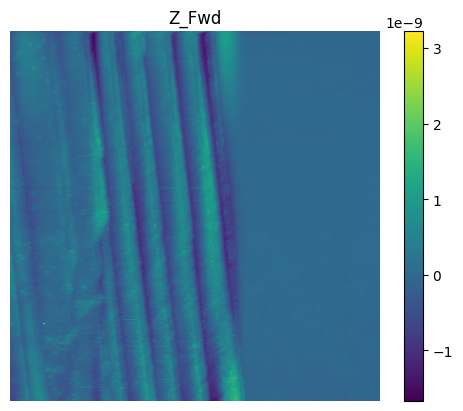

In [3]:
# pip install stmpy scikit-learn scipy matplotlib
import os
import sys
import matplotlib.pyplot as plt

# Ensure we can import stm_utils from the repository structure
repo_rel_utils_dir = os.path.join('.', 'stm_data_code_sample', '2D_image_data')
if repo_rel_utils_dir not in sys.path:
    sys.path.insert(0, repo_rel_utils_dir)

try:
    from stm_utils import Sxm_Image
except Exception as e:
    raise ImportError("Failed to import Sxm_Image from stm_utils. Ensure the path is correct and dependencies are installed. "
                      "Try: pip install stmpy scikit-learn scipy matplotlib") from e

def select_height_channel(channels):
    # Preference order and common aliases for topography/height channels
    preferred = [
        'Z_Fwd', 'Z_Bkd', 'Z_Forward', 'Z_Backward',
        'Height', 'Topography', 'Topo', 'Z', 'ZSensor'
    ]
    ch_lower_map = {ch.lower(): ch for ch in channels}

    # Exact preferred names (case-insensitive)
    for name in preferred:
        if name.lower() in ch_lower_map:
            return ch_lower_map[name.lower()]

    # Fallback: any channel containing common substrings
    substrings = ['z', 'height', 'topo', 'topography']
    for sub in substrings:
        for ch in channels:
            if sub in ch.lower():
                return ch

    # As a last resort, return the first available channel
    return channels[0] if channels else None

def main():
    filepath = os.path.join('.', 'stm_data_code_sample', '2D_image_data', 'image.sxm')
    if not os.path.isfile(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

    im = Sxm_Image(filepath)
    channels = im.get_channels()

    if not channels:
        raise RuntimeError("No channels found in the SXM file.")

    channel = select_height_channel(channels)
    if channel is None:
        raise RuntimeError("Could not determine a suitable Z/height channel from the SXM file.")

    image = im.image(channel)

    plt.figure()
    plt.imshow(image, origin='lower')
    plt.colorbar()
    plt.title(channel)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()

prediction to plot with 3D data - gpt-5

File import successful.
Nearest Probed bias =  1.2000000000000002


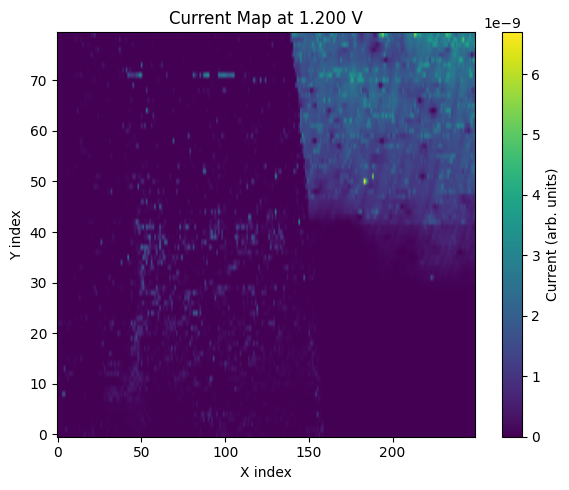

In [5]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# pip install hoffmanstmpy

try:
    import stmpy
except ImportError as e:
    raise ImportError("stmpy is required. Install via: pip install hoffmanstmpy") from e

def load_cits_class_module(module_path):
    import importlib.util
    spec = importlib.util.spec_from_file_location("CITS_Class", module_path)
    if spec is None or spec.loader is None:
        raise ImportError(f"Cannot load module from {module_path}")
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    # Ensure stmpy is available to the module if it relies on a global reference
    setattr(module, "stmpy", stmpy)
    # Ensure numpy if needed
    if not hasattr(module, "np"):
        setattr(module, "np", np)
    return module

def main():
    repo_root = os.path.abspath(".")
    data_path = os.path.join(repo_root, "stm_data_code_sample", "3D_hyperspectral_data", "cits_data.3ds")
    if not os.path.isfile(data_path):
        raise FileNotFoundError(f"Could not find data file at: {data_path}")

    cits_module_path = os.path.join(repo_root, "stm_data_code_sample", "3D_hyperspectral_data", "CITS_Class.py")
    if not os.path.isfile(cits_module_path):
        raise FileNotFoundError(f"Could not find CITS_Class.py at: {cits_module_path}")

    CITS_Module = load_cits_class_module(cits_module_path)
    if not hasattr(CITS_Module, "CITS_Analysis"):
        raise AttributeError("CITS_Analysis class not found in CITS_Class.py")

    data = CITS_Module.CITS_Analysis(data_path)

    probe_bias = 1.2
    i_2D, V_actual = data.current_map(probe_bias)
    print("Nearest Probed bias = ", V_actual)

    plt.figure(figsize=(6, 5))
    plt.imshow(i_2D, aspect='auto', origin='lower')
    plt.title(f"Current Map at {V_actual:.3f} V")
    plt.xlabel("X index")
    plt.ylabel("Y index")
    plt.colorbar(label="Current (arb. units)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()